In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv("Movie_Ratings.csv")

In [11]:
data.head()

,s.no.,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [12]:
data.shape

(58788, 25)

In [13]:
data.nunique()

s.no.          58788
title          56007
year             113
length           305
budget           756
rating            91
votes           4373
r1                12
r2                10
r3                10
r4                11
r5                11
r6                10
r7                11
r8                11
r9                11
r10               12
mpaa               4
Action             2
Animation          2
Comedy             2
Drama              2
Documentary        2
Romance            2
Short              2
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58788 entries, 0 to 58787
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   s.no.        58788 non-null  int64  
 1   title        58788 non-null  object 
 2   year         58788 non-null  int64  
 3   length       58788 non-null  int64  
 4   budget       5215 non-null   float64
 5   rating       58788 non-null  float64
 6   votes        58788 non-null  int64  
 7   r1           58788 non-null  float64
 8   r2           58788 non-null  float64
 9   r3           58788 non-null  float64
 10  r4           58788 non-null  float64
 11  r5           58788 non-null  float64
 12  r6           58788 non-null  float64
 13  r7           58788 non-null  float64
 14  r8           58788 non-null  float64
 15  r9           58788 non-null  float64
 16  r10          58788 non-null  float64
 17  mpaa         4924 non-null   object 
 18  Action       58788 non-null  int64  
 19  Anim

In [15]:
data.dtypes

s.no.            int64
title           object
year             int64
length           int64
budget         float64
rating         float64
votes            int64
r1             float64
r2             float64
r3             float64
r4             float64
r5             float64
r6             float64
r7             float64
r8             float64
r9             float64
r10            float64
mpaa            object
Action           int64
Animation        int64
Comedy           int64
Drama            int64
Documentary      int64
Romance          int64
Short            int64
dtype: object

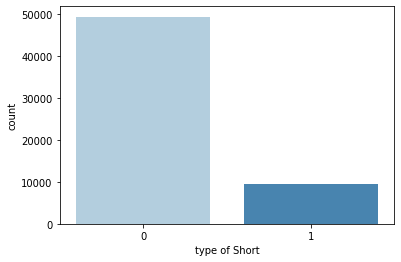

In [16]:
sns.countplot(x='Short', data=data, palette='Blues')
plt.xlabel('type of Short')
plt.show()

In [17]:
data.isnull().sum()

s.no.              0
title              0
year               0
length             0
budget         53573
rating             0
votes              0
r1                 0
r2                 0
r3                 0
r4                 0
r5                 0
r6                 0
r7                 0
r8                 0
r9                 0
r10                0
mpaa           53864
Action             0
Animation          0
Comedy             0
Drama              0
Documentary        0
Romance            0
Short              0
dtype: int64

In [18]:
data = data.dropna(axis = 1)

In [19]:
data = data.drop('title', axis = 1)

In [20]:
data.nunique()

s.no.          58788
year             113
length           305
rating            91
votes           4373
r1                12
r2                10
r3                10
r4                11
r5                11
r6                10
r7                11
r8                11
r9                11
r10               12
Action             2
Animation          2
Comedy             2
Drama              2
Documentary        2
Romance            2
Short              2
dtype: int64

In [21]:
data['Short'].value_counts()

0    49330
1     9458
Name: Short, dtype: int64

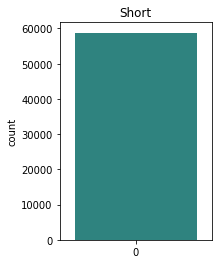

In [22]:
plt.subplot(1,2,2)
sns.countplot(data['Short'], palette='viridis')
plt.title("Short")
plt.show()

In [23]:
all_features = ['s.no.','year','length','rating','votes','r1',
'r2','r3','r4','r5','r6','r7','r8','r9',
'r10','Action','Animation','Comedy',
'Drama','Documentary','Romance']


X = data[all_features]
y = data['Short']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [25]:
#prediction of train data

# Instantiate logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on train data
y_pred = lr.predict(X_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9979587497342122
Precision: 0.9953327110281371
Recall: 0.9918936877076412
F1 Score: 0.9936102236421726


In [26]:
#prediction of test data


# Instantiate logistic regression model
LR = LogisticRegression()

# Fit the model to the training data
LR.fit(X_test, y_test)

# Predict on test data
Y_pred = LR.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9983840789249873
Precision: 0.9953416149068323
Recall: 0.9948266942576306
F1 Score: 0.9950840879689521


In [27]:
# Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate logistic regression model
Logreg = LogisticRegression()

# Fit the model to the training data
Logreg.fit(X_train_scaled, y_train)

# Predict on test data
y_Pred = Logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)

print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)


Logistic Regression Accuracy: 0.997958836536826
Logistic Regression Precision: 0.9958441558441559
Logistic Regression Recall: 0.991722710812209
Logistic Regression F1 Score: 0.9937791601866253


# Hyper Parameter tuning


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
hyperparameters = {'C': [0.01, 0.1,0.2,1, 10],
                   'penalty': ['l1', 'l2']}

In [30]:
grid_search = GridSearchCV(lr, hyperparameters, cv=5)

In [31]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.2, 1, 10], 'penalty': ['l1', 'l2']})

In [32]:
best_params = grid_search.best_params_

In [33]:
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [36]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9979587497342122
Precision: 0.9953327110281371
Recall: 0.9918936877076412
F1 Score: 0.9936102236421726


In [34]:
y_train_pred=best_logistic_reg.predict(X_test_scaled)
y_Pred = best_logistic_reg.predict(X_test_scaled)

In [35]:
print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)

Logistic Regression Accuracy: 0.997958836536826
Logistic Regression Precision: 0.9958441558441559
Logistic Regression Recall: 0.991722710812209
Logistic Regression F1 Score: 0.9937791601866253
